In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils
import copy

In [2]:
micapipe_dir = '/data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0'
hippunfold_dir = '/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0/hippunfold'

subs = ['PNC001', 'PNC002', 'PNC003', 'PNC004', 'PNC005', 'PNC006', 'PNC007', 'PNC008',  'PNC009', 'PNC010', 'PNC011', 'PNC012', 'PNC013']
ses = '01'
hemis = ['L','R']
labels = ['hipp','dentate'] 

ind = [range(7262), range(7262,7262+1788)]

In [3]:
features = ['model-DTI_map-FA', 'model-DTI_map-ADC']
for feature in features:
    for sub in subs:
        for hemi in hemis:
            for label in labels:
                cmd = f'wb_command -volume-to-surface-mapping '\
                    f'{micapipe_dir}/sub-{sub}/ses-{ses}/maps/sub-{sub}_ses-{ses}_space-nativepro_{feature}.nii.gz '\
                    f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_midthickness.surf.gii '\
                    f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_{feature}.shape.gii '\
                    f'-trilinear'
                !{cmd}


While running:
/data/mica1/01_programs/workbench-1.4.2/bin_linux64/../exe_linux64/wb_command -volume-to-surface-mapping /data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/sub-PNC002/ses-01/maps/sub-PNC002_ses-01_space-nativepro_model-DTI_map-FA.nii.gz /data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0/hippunfold/sub-PNC002/ses-01/surf/sub-PNC002_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_midthickness.surf.gii /data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0/hippunfold/sub-PNC002/ses-01/surf/sub-PNC002_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_model-DTI_map-FA.shape.gii -trilinear

ERROR: NAME OF FILE: sub-PNC002_ses-01_space-nativepro_model-DTI_map-FA.nii.gz
PATH TO FILE: /data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/sub-PNC002/ses-01/maps

File does not exist.


While running:
/data/mica1/01_programs/workbench-1.4.2/bin_linux64/../exe_linux64/wb_command -volume-to-surface-mapping /data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/sub-PNC002/ses-01/maps/sub-PNC002_ses-01_space-n

In [4]:
for sub in subs:
    for hemi in hemis:
        for label in labels:
            cmd = f'wb_command -volume-to-surface-mapping '\
                f'{micapipe_dir}/../../rawdata/sub-{sub}/ses-{ses}/anat/sub-{sub}_ses-{ses}_acq-T1_T1map.nii.gz '\
                f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_midthickness.surf.gii '\
                f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_qT1.shape.gii '\
                f'-trilinear'
            !{cmd}


While running:
/data/mica1/01_programs/workbench-1.4.2/bin_linux64/../exe_linux64/wb_command -volume-to-surface-mapping /data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/../../rawdata/sub-PNC008/ses-01/anat/sub-PNC008_ses-01_acq-T1_T1map.nii.gz /data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0/hippunfold/sub-PNC008/ses-01/surf/sub-PNC008_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_midthickness.surf.gii /data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0/hippunfold/sub-PNC008/ses-01/surf/sub-PNC008_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_qT1.shape.gii -trilinear

ERROR: NAME OF FILE: sub-PNC008_ses-01_acq-T1_T1map.nii.gz
PATH TO FILE: /data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/../../rawdata/sub-PNC008/ses-01/anat

File does not exist.


While running:
/data/mica1/01_programs/workbench-1.4.2/bin_linux64/../exe_linux64/wb_command -volume-to-surface-mapping /data/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/../../rawdata/sub-PNC008/ses-01/anat/sub-PNC008_ses-01_acq-T1_T1map.nii.g

In [5]:
features = ['thickness', 'gyrification', 'curvature', 'model-DTI_map-FA', 'model-DTI_map-ADC', 'qT1']
hipp_dat = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan

for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/'\
                                 f'sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-0p5mm_label-{label}_{feature}.shape.gii')
                    hipp_dat[ind[l],h,s,f] = d.darrays[0].data
                except:
                    hipp_dat[ind[l],h,s,f] = np.nan

In [6]:
# flip L curvatures
hipp_dat[:,0,:,2] = -hipp_dat[:,0,:,2]

/tmp/ipykernel_32770/846346238.py:1: RuntimeWarning: Mean of empty slice
  cdata = np.nanmean(hipp_dat,axis=2)
/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


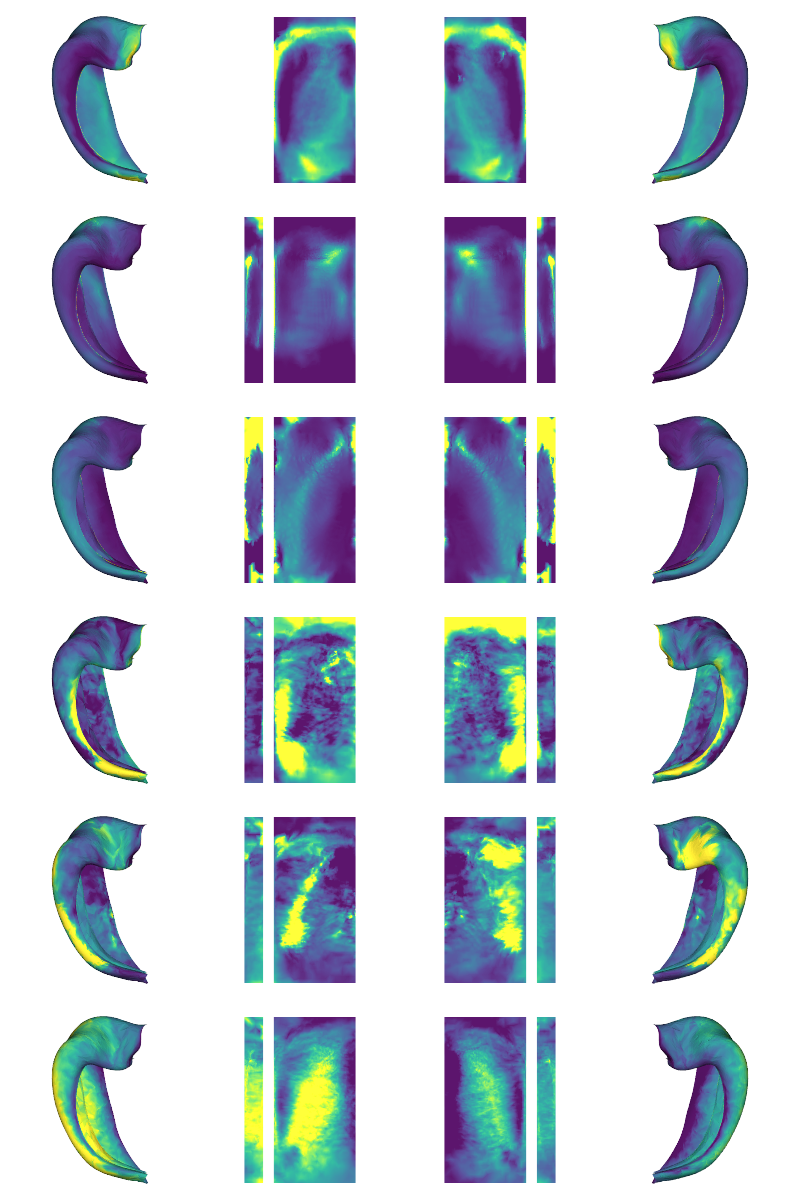

In [7]:
cdata = np.nanmean(hipp_dat,axis=2)
plotting.surfplot_canonical_foldunfold(cdata[:,:,:], den='0p5mm', color_bar=('right'), size=[400,200], tighten_cwindow=True, embed_nb=True)